In [2]:
!pip install tensorflow keras matplotlib scikit-learn


Defaulting to user installation because normal site-packages is not writeable


In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix


In [8]:
train_dir = "E:/Downloads/archive (1)/Dataset/Train"
test_dir = "E:/Downloads/archive (1)/Dataset/test"


In [10]:
img_size = (128, 128)
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1.0/255)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical"
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical"
)

print("Soil Classes:", train_data.class_indices)


Found 1215 images belonging to 4 classes.
Found 340 images belonging to 4 classes.
Soil Classes: {'Alluvial soil': 0, 'Black Soil': 1, 'Clay soil': 2, 'Red soil': 3}


In [11]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_data.num_classes, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,305,156 (12.61 MB)

 Trainable params: 3,305,156 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Train the model
history = model.fit(
    train_data,
    epochs=10,   # you can increase this to 20–30 for better accuracy
    validation_data=test_data
)


C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step - accuracy: 0.6535 - loss: 0.8666 - val_accuracy: 0.7059 - val_loss: 0.8619
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 34s 898ms/step - accuracy: 0.7827 - loss: 0.5909 - val_accuracy: 0.7676 - val_loss: 0.5004
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 35s 918ms/step - accuracy: 0.8049 - loss: 0.4713 - val_accuracy: 0.7912 - val_loss: 0.4627
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 35s 909ms/step - accuracy: 0.8280 - loss: 0.4394 - val_accuracy: 0.8382 - val_loss: 0.3829
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 34s 900ms/step - accuracy: 0.8428 - loss: 0.3650 - val_accuracy: 0.8735 - val_loss: 0.3129
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 35s 911ms/step - accuracy: 0.8453 - loss: 0.3646 - val_accuracy: 0.8912 - val_loss: 0.3182
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.8658 - loss: 0.3354 - val_accuracy: 0.8971 - val_loss: 0.2551
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 48s 1s/step - accuracy: 0.8774 - loss: 0.2998 - val_accuracy: 0.9

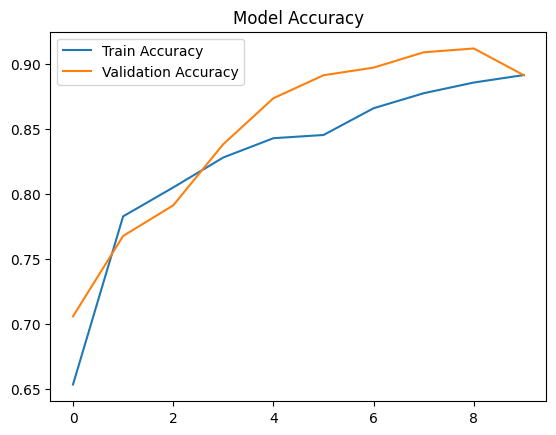

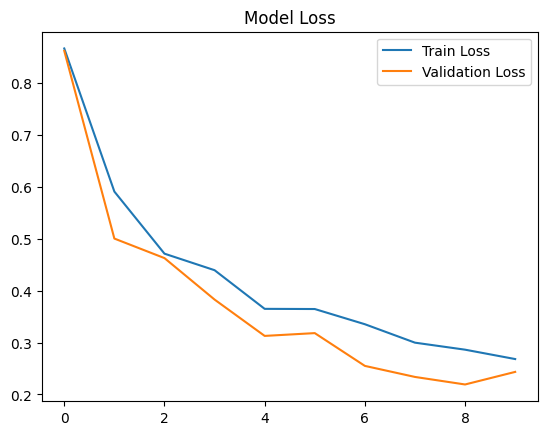

In [13]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Model Accuracy")
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Model Loss")
plt.show()


In [14]:
# Evaluate the model
y_true = test_data.classes  # actual labels
y_pred = model.predict(test_data)
y_pred_classes = np.argmax(y_pred, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:\n", cm)

# Classification Report
print("\nClassification Report:\n")
print(classification_report(y_true, y_pred_classes, target_names=list(train_data.class_indices.keys())))


11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 367ms/step
Confusion Matrix:
 [[10 16  4 23]
 [17 49 16 34]
 [11 20 14 20]
 [19 37 17 33]]

Classification Report:

               precision    recall  f1-score   support

Alluvial soil       0.18      0.19      0.18        53
   Black Soil       0.40      0.42      0.41       116
    Clay soil       0.27      0.22      0.24        65
     Red soil       0.30      0.31      0.31       106

     accuracy                           0.31       340
    macro avg       0.29      0.28      0.29       340
 weighted avg       0.31      0.31      0.31       340



In [16]:
import os

# Pick the first image in Red soil test folder
folder = "E:/Downloads/archive (1)/Dataset/test/Red soil/"
file_name = os.listdir(folder)[0]   # first file
img_path = os.path.join(folder, file_name)

print("Using test image:", img_path)

# Load and preprocess
img = image.load_img(img_path, target_size=(128,128))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Predict
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction)

class_labels = {v:k for k,v in train_data.class_indices.items()}
print("Predicted Soil Type:", class_labels[predicted_class])


Using test image: E:/Downloads/archive (1)/Dataset/test/Red soil/Copy of 1000_F_233167094_JhQz9xvHtlN5UyT3zt748JiJolOSid7s.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step
Predicted Soil Type: Red soil


In [17]:
# Soil to Crop Mapping
soil_to_crop = {
    "Red soil": ["Groundnut", "Millets", "Potato", "Rice"],
    "Black soil": ["Cotton", "Soybean", "Wheat", "Tur dal"],
    "Alluvial soil": ["Rice", "Wheat", "Sugarcane", "Pulses"],
    "Laterite soil": ["Cashew", "Tea", "Coffee", "Rubber"],
    "Desert soil": ["Barley", "Millets", "Cactus", "Dates"]
}

# After prediction
predicted_soil = class_labels[predicted_class]
print("Predicted Soil Type:", predicted_soil)

if predicted_soil in soil_to_crop:
    print("Best suited crops:", ", ".join(soil_to_crop[predicted_soil]))
else:
    print("No crop data available for this soil type.")


Predicted Soil Type: Red soil
Best suited crops: Groundnut, Millets, Potato, Rice


In [18]:
import json, tensorflow as tf
labels = list(train_data.class_indices.keys())
tf.keras.models.save_model(model, "soil_cnn_best.h5")
with open("class_indices.json","w") as f: json.dump(train_data.class_indices, f, indent=2)
print("Saved soil_cnn_best.h5 and class_indices.json")


Saved soil_cnn_best.h5 and class_indices.json
